In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
train = pd.read_csv('/content/drive/MyDrive/Cyberlabs- ML/polynomial_data/Polynomial_train.csv')
train.head()

,Unnamed: 0,X,Y,Z,label
0,0,0.643715,-9.866550,-5.836019,307.972927
1,1,-1.366446,-3.761945,-8.756162,136.398375
2,2,-4.090270,-1.836218,-1.846066,-310.724813
3,3,-8.730478,-1.923651,3.892972,1.755447
4,4,5.367169,0.358357,6.703989,-343.582590


In [ ]:
test = pd.read_csv('/content/drive/MyDrive/Cyberlabs- ML/polynomial_data/Polynomial_test.csv')
test.head()

,Unnamed: 0,X,Y,Z,label
0,0,9.322078,0.413096,5.984731,-657.669309
1,1,2.811964,6.142752,6.419237,-545.362524
2,2,-2.669784,7.775091,-6.931907,-75.044187
3,3,-6.992156,-9.205548,0.852580,-2403.124902
4,4,1.574294,-2.213266,6.029188,8.595325


In [ ]:
l= train.shape[1]
X_train= train.iloc[:, 1:l-1]
y_train= train.iloc[:, l-1]

X_train= X_train.to_numpy()
y_train= y_train.to_numpy()
y_train= y_train.reshape(X_train.shape[0], 1)

m= X_train.shape[0]
n= X_train.shape[1]

print(X_train.shape)
print(y_train.shape)
print(m)
print(n)

(50000, 3)
(50000, 1)
50000
3


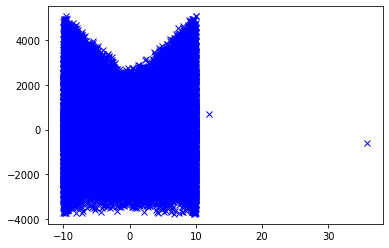

In [ ]:
plt.plot(X_train, y_train, 'bx')

In [ ]:
def featureNormalization(X):
  X_norm= X
  mu=np.mean(X, axis=0)
  sigma= np.std(X, axis=0)
  X_norm= (X- mu)/sigma 

  return [X_norm, mu, sigma]

In [ ]:
[X_train, mu, sigma]= featureNormalization(X_train)

In [ ]:
def transformX(X,m):
  X_final= np.ones((m, 1))
  for i in range(n):
    X1= X[:, i]
    if i != n-1 :
      X2= X[:, i+1]
    else:
      X2= X[:, 0]

    X1= X1.reshape(m, 1)
    X2= X2.reshape(m, 1)
    X_final= np.append(X_final, X1, axis=1)
    X_final= np.append(X_final, np.square(X1), axis=1)
    X_final= np.append(X_final, X1*X2, axis=1)
  return X_final

In [ ]:
def computeCost(X_train, y_train, theta):
  m= y_train.shape[0]
  J=0
  predictions= np.dot(X_train, theta)
  J= 1/(2*m) * np.sum(np.square(predictions-y_train))
  return J

In [ ]:
def gradientDescent(X_train, y_train, theta, alpha, num_iters):
  m= y_train.shape[0]
  J_history= np.zeros((num_iters, 1))

  for iter in range(0, num_iters-1):
    predictions= np.dot(X_train, theta)
    predictions.shape
    delta= np.dot(X_train.T, predictions - y_train)/m
    delta.shape
    theta= theta - alpha*delta
    J_history[iter]= computeCost(X_train, y_train, theta)

  return [theta, J_history]

In [ ]:
X_train= transformX(X_train, m)
print(X_train.shape)
k = X_train.shape[1]

theta= np.zeros((k, 1))

alpha = 0.01
num_iters= 10000

J_hist= np.zeros((num_iters, 1))
[theta, J_hist]= gradientDescent(X_train, y_train, theta, alpha, num_iters)
print("Theta calculated from gradient descent is ", theta)
theta.shape

(50000, 10)
Theta calculated from gradient descent is  [[   -1.89244832]
 [    6.48439408]
 [   35.22993919]
 [-1068.68211299]
 [   -3.61712425]
 [ -167.67503247]
 [  234.53205478]
 [   -3.72605771]
 [  133.96195742]
 [ -467.61892642]]


(10, 1)

[[7.12649246e+05]
 [6.98525069e+05]
 [6.84682201e+05]
 ...
 [6.54327305e+01]
 [6.54327305e+01]
 [0.00000000e+00]]


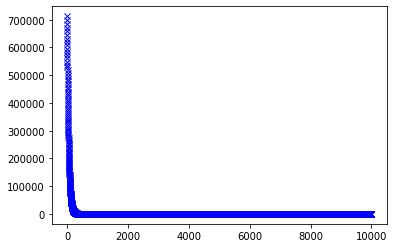

In [ ]:
print(J_hist)
plt.plot(range(num_iters), J_hist, 'bx')

In [ ]:
l= test.shape[1]
X_test= test.iloc[:, 1:l-1]
y_test= test.iloc[:, l-1]

X_test= X_test.to_numpy()
y_test= y_test.to_numpy()
y_test= y_test.reshape(X_test.shape[0], 1)

print(X_test.shape)
print(y_test.shape)

m=X_test.shape[0]

(10000, 3)
(10000, 1)


In [ ]:
X_test = (X_test - mu)/sigma 
X_test 

array([[ 1.6102745 ,  0.07766879,  1.0320618 ],
       [ 0.48165174,  1.06705594,  1.10714074],
       [-0.46868889,  1.34892546, -1.19982224],
       ...,
       [ 1.14547015,  1.19175129,  0.77753223],
       [-1.09152346,  0.23482447, -0.67900151],
       [ 1.43131274, -0.05782099,  0.36064771]])

In [ ]:
X_test= transformX(X_test, m)
print(X_test.shape)

(10000, 10)


In [ ]:
y_predict= np.dot(X_test, theta)
l= y_predict.shape

In [ ]:
mean_y_predict= np.mean(y_predict) * np.ones(l)
mean_y_test = np.mean(y_test) * np.ones(l)
accuracy = np.sum(np.square(y_predict - mean_y_predict)) / np.sum(np.square(y_test - mean_y_test)) * 100
print(accuracy)

99.99619800733774
